In [26]:
import uproot

# import this, lol this is funny
import os
import time
import numpy as np
import matplotlib.pyplot as plt

In [27]:

# these are from paddles and alpha PMT
RELEVANT_CHANNELS = [
    "adc_b1_ch1",
    "adc_b1_ch2",
    "adc_b1_ch3",
    "adc_b1_ch4",
    "adc_b1_ch5",
    "adc_b1_ch6",
    "adc_b1_ch7",
    "adc_b1_ch8",
    "adc_b1_ch9",
    "adc_b1_ch10",
    "adc_b1_ch11",
    "adc_b1_ch12",
    "adc_b1_ch13",
    "adc_b1_ch14",
    "adc_b1_ch15",
    "adc_b2_ch0",
    "adc_b2_ch1",
    "adc_b2_ch2",
    "adc_b2_ch3",
    "adc_b2_ch4",
    "adc_b2_ch5",
    "adc_b2_ch6",
    "adc_b2_ch7",
    "adc_b2_ch8",
    "adc_b2_ch9",
    "adc_b2_ch10",
    "adc_b2_ch11",
    "adc_b2_ch12",
    "adc_b2_ch13",
    "adc_b2_ch14",
    "adc_b3_ch0",
    "adc_b3_ch1",
    "adc_b3_ch2",
    "adc_b3_ch3",
    "adc_b3_ch4",
    "adc_b3_ch5",
    "adc_b3_ch6",
    "adc_b3_ch7",
    "adc_b3_ch8",
    "adc_b3_ch9",
    "adc_b3_ch10",
    "adc_b3_ch11",
    "adc_b3_ch12",
    "adc_b3_ch13",
    "adc_b3_ch14",
    "adc_b3_ch15",
    "adc_b4_ch0",
    "adc_b4_ch1",
    "adc_b4_ch2",
    "adc_b4_ch3",
    "adc_b4_ch4",
    "adc_b4_ch5",
    "adc_b4_ch6",
    "adc_b4_ch7",
    "adc_b4_ch8",
    "adc_b4_ch9",
    "adc_b4_ch10",
    "adc_b4_ch11",
]
IRRELEVANT_CHANNELS = [
    "adc_b1_ch0",
    "adc_b2_ch15",
    "adc_b4_ch12",
    "adc_b4_ch13",
    "adc_b4_ch14",
    "adc_b4_ch15",
]
BOTTOM_PMT_CHANNELS = [
    "adc_b1_ch1",
    "adc_b1_ch2",
    "adc_b1_ch3",
    "adc_b1_ch4",
    "adc_b1_ch5",
    "adc_b1_ch6",
    "adc_b1_ch7",
    "adc_b1_ch8",
    "adc_b1_ch9",
    "adc_b1_ch10",
    "adc_b1_ch11",
    "adc_b1_ch12",
    "adc_b1_ch13",
    "adc_b1_ch14",
    "adc_b1_ch15",
    "adc_b2_ch0",
    "adc_b2_ch1",
    "adc_b2_ch2",
    "adc_b2_ch3",
    "adc_b2_ch4",
    "adc_b2_ch5",
    "adc_b2_ch6",
    "adc_b2_ch7",
    "adc_b2_ch8",
    "adc_b2_ch9",
    "adc_b2_ch10",
    "adc_b2_ch11",
    "adc_b2_ch12",
    "adc_b2_ch13",
    "adc_b2_ch14",
]
# all side, including supp (28 total)
SIDE_PMT_CHANNELS = [
    "adc_b3_ch0",
    "adc_b3_ch1",
    "adc_b3_ch2",
    "adc_b3_ch3",
    "adc_b3_ch4",
    "adc_b3_ch5",
    "adc_b3_ch6",
    "adc_b3_ch7",
    "adc_b3_ch8",
    "adc_b3_ch9",
    "adc_b3_ch10",
    "adc_b3_ch11",
    "adc_b3_ch12",
    "adc_b3_ch13",
    "adc_b3_ch14",
    "adc_b3_ch15",
    "adc_b4_ch0",
    "adc_b4_ch1",
    "adc_b4_ch2",
    "adc_b4_ch3",
    "adc_b4_ch4",
    "adc_b4_ch5",
    "adc_b4_ch6",
    "adc_b4_ch7",
    "adc_b4_ch8",
    "adc_b4_ch9",
    "adc_b4_ch10",
    "adc_b4_ch11",
]

# produced using /home/dcolson/my_analysis/TOF_alpha_source.py
CHANNELS_AND_DISTANCES_MM_DICT = {
    "adc_b1_ch1": np.float64(849.099648156799),
    "adc_b1_ch2": np.float64(831.7868912768462),
    "adc_b1_ch3": np.float64(829.9985737939554),
    "adc_b1_ch4": np.float64(843.8334032852694),
    "adc_b1_ch5": np.float64(817.181418046201),
    "adc_b1_ch6": np.float64(774.2681835126638),
    "adc_b1_ch7": np.float64(746.5426645544112),
    "adc_b1_ch8": np.float64(735.7239020175979),
    "adc_b1_ch9": np.float64(742.5512440229294),
    "adc_b1_ch10": np.float64(766.5533380006899),
    "adc_b1_ch11": np.float64(806.1976618671131),
    "adc_b1_ch12": np.float64(799.0517583360918),
    "adc_b1_ch13": np.float64(746.4080469153586),
    "adc_b1_ch14": np.float64(708.4456312943147),
    "adc_b1_ch15": np.float64(687.6004890196051),
    "adc_b2_ch0": np.float64(685.4360892891474),
    "adc_b2_ch1": np.float64(702.1252114117539),
    "adc_b2_ch2": np.float64(736.3871077768812),
    "adc_b2_ch3": np.float64(785.9269129505618),
    "adc_b2_ch4": np.float64(770.6305664843563),
    "adc_b2_ch5": np.float64(724.9670475269893),
    "adc_b2_ch6": np.float64(695.2783255646619),
    "adc_b2_ch7": np.float64(683.6487840989699),
    "adc_b2_ch8": np.float64(690.9908465385051),
    "adc_b2_ch9": np.float64(716.7217172654949),
    "adc_b2_ch10": np.float64(758.973431682559),
    "adc_b2_ch11": np.float64(757.0615645375216),
    "adc_b2_ch12": np.float64(737.5916434586281),
    "adc_b2_ch13": np.float64(735.5743555209086),
    "adc_b2_ch14": np.float64(751.1503261664739),
    "adc_b3_ch0": np.float64(659.9604927758934),
    "adc_b3_ch1": np.float64(550.9007755712457),
    "adc_b3_ch2": np.float64(489.51080123425265),
    "adc_b3_ch3": np.float64(587.5588923886694),
    "adc_b3_ch4": np.float64(801.4576670199119),
    "adc_b3_ch5": np.float64(714.3375984259824),
    "adc_b3_ch6": np.float64(668.1372347991093),
    "adc_b3_ch7": np.float64(742.9750951579737),
    "adc_b3_ch8": np.float64(743.5038345731648),
    "adc_b3_ch9": np.float64(648.646101140676),
    "adc_b3_ch10": np.float64(597.3867461912761),
    "adc_b3_ch11": np.float64(680.05555069053),
    "adc_b3_ch12": np.float64(724.6270019982695),
    "adc_b3_ch13": np.float64(626.9195359254647),
    "adc_b3_ch14": np.float64(573.7222886771962),
    "adc_b3_ch15": np.float64(659.3647640153363),
    "adc_b4_ch0": np.float64(524.24994644984),
    "adc_b4_ch1": np.float64(481.6652557938034),
    "adc_b4_ch2": np.float64(496.8615186726177),
    "adc_b4_ch3": np.float64(633.6100188228246),
    "adc_b4_ch4": np.float64(598.8531274351918),
    "adc_b4_ch5": np.float64(611.1423879405355),
    "adc_b4_ch6": np.float64(648.8899545783246),
    "adc_b4_ch7": np.float64(614.9972239278077),
    "adc_b4_ch8": np.float64(626.9701233214068),
    "adc_b4_ch9": np.float64(505.2143002258151),
    "adc_b4_ch10": np.float64(460.8740624497218),
    "adc_b4_ch11": np.float64(476.7335225654475),
}
CHANNELS_AND_TIMES_NS_DICT = {
    "adc_b1_ch1": np.float64(2.8303321605226635),
    "adc_b1_ch2": np.float64(2.7726229709228205),
    "adc_b1_ch3": np.float64(2.766661912646518),
    "adc_b1_ch4": np.float64(2.8127780109508977),
    "adc_b1_ch5": np.float64(2.723938060154003),
    "adc_b1_ch6": np.float64(2.5808939450422126),
    "adc_b1_ch7": np.float64(2.488475548514704),
    "adc_b1_ch8": np.float64(2.4524130067253265),
    "adc_b1_ch9": np.float64(2.4751708134097647),
    "adc_b1_ch10": np.float64(2.555177793335633),
    "adc_b1_ch11": np.float64(2.6873255395570435),
    "adc_b1_ch12": np.float64(2.663505861120306),
    "adc_b1_ch13": np.float64(2.4880268230511953),
    "adc_b1_ch14": np.float64(2.3614854376477155),
    "adc_b1_ch15": np.float64(2.2920016300653505),
    "adc_b2_ch0": np.float64(2.284786964297158),
    "adc_b2_ch1": np.float64(2.3404173713725127),
    "adc_b2_ch2": np.float64(2.454623692589604),
    "adc_b2_ch3": np.float64(2.6197563765018725),
    "adc_b2_ch4": np.float64(2.5687685549478543),
    "adc_b2_ch5": np.float64(2.4165568250899643),
    "adc_b2_ch6": np.float64(2.317594418548873),
    "adc_b2_ch7": np.float64(2.2788292803298997),
    "adc_b2_ch8": np.float64(2.3033028217950173),
    "adc_b2_ch9": np.float64(2.389072390884983),
    "adc_b2_ch10": np.float64(2.529911438941863),
    "adc_b2_ch11": np.float64(2.523538548458405),
    "adc_b2_ch12": np.float64(2.4586388115287603),
    "adc_b2_ch13": np.float64(2.451914518403029),
    "adc_b2_ch14": np.float64(2.503834420554913),
    "adc_b3_ch0": np.float64(2.199868309252978),
    "adc_b3_ch1": np.float64(1.836335918570819),
    "adc_b3_ch2": np.float64(1.6317026707808422),
    "adc_b3_ch3": np.float64(1.9585296412955646),
    "adc_b3_ch4": np.float64(2.6715255567330396),
    "adc_b3_ch5": np.float64(2.381125328086608),
    "adc_b3_ch6": np.float64(2.227124115997031),
    "adc_b3_ch7": np.float64(2.476583650526579),
    "adc_b3_ch8": np.float64(2.4783461152438826),
    "adc_b3_ch9": np.float64(2.16215367046892),
    "adc_b3_ch10": np.float64(1.9912891539709203),
    "adc_b3_ch11": np.float64(2.2668518356351),
    "adc_b3_ch12": np.float64(2.4154233399942315),
    "adc_b3_ch13": np.float64(2.089731786418216),
    "adc_b3_ch14": np.float64(1.9124076289239873),
    "adc_b3_ch15": np.float64(2.1978825467177874),
    "adc_b4_ch0": np.float64(1.7474998214994666),
    "adc_b4_ch1": np.float64(1.6055508526460114),
    "adc_b4_ch2": np.float64(1.656205062242059),
    "adc_b4_ch3": np.float64(2.112033396076082),
    "adc_b4_ch4": np.float64(1.9961770914506394),
    "adc_b4_ch5": np.float64(2.0371412931351185),
    "adc_b4_ch6": np.float64(2.162966515261082),
    "adc_b4_ch7": np.float64(2.0499907464260256),
    "adc_b4_ch8": np.float64(2.089900411071356),
    "adc_b4_ch9": np.float64(1.6840476674193838),
    "adc_b4_ch10": np.float64(1.536246874832406),
    "adc_b4_ch11": np.float64(1.589111741884825),
}

def get_1t_info(fname: str):
    f = uproot.open(fname)
    daq = f["daq"]
    # sometimes this isn't in the root file
    if "run_info" in f:
        run_info = f["run_info"]
    else:
        run_info = None
    daqkeys = daq.keys()
    traces = {}
    for key in daq.keys():
        if "adc" in key:
            traces[key] = daq[key].array(library="np")
    event_ttt1 = daq["event_ttt_1"].array(library="np")
    event_ttt2 = daq["event_ttt_2"].array(library="np")
    event_ttt3 = daq["event_ttt_3"].array(library="np")
    event_ttt4 = daq["event_ttt_4"].array(library="np")
    event_ttt5 = daq["event_ttt_5"].array(library="np")
    event_id = daq["event_id"].array(library="np")
    event_sanity = daq["event_sanity"].array(library="np")
    # event_ttt = daq['event_ttt'].array(library='np')

    return (
        traces,
        event_ttt1.astype(np.int64),
        event_ttt2.astype(np.int64),
        event_ttt3.astype(np.int64),
        event_ttt4.astype(np.int64),
        event_ttt5.astype(np.int64),
        event_id,
        event_sanity,
        daqkeys,
        run_info,
    )

def correct_times(event_ttt1, event_ttt5, event_id):
    """Correct the events by comparing closest in 1 and 5 board"""
    array_idx = sorted(range(len(event_id)), key=lambda i: event_id[i])

    event_ttt5_good = event_ttt5[array_idx]
    event_ttt1_good = event_ttt1[array_idx]

    event_ttt5_good_idx = []
    event_ttt1_good_idx = []

    window_size = 3

    for i, val1 in enumerate(event_ttt1_good):
        # Define the search window (max 3 elements before and after in event_ttt5_good)
        start_idx = max(i - window_size, 0)
        end_idx = min(i + window_size + 1, len(event_ttt5_good))

        # Find the index of the closest element in event_ttt5_good within the window
        local_window = event_ttt5_good[start_idx:end_idx]
        closest_idx = (
            np.argmin(np.abs(local_window - val1)) + start_idx
        )  # Add start_idx to get global index

        if -17 < (event_ttt5_good[closest_idx] - val1) < -13:
            event_ttt1_good_idx.append(i)
            event_ttt5_good_idx.append(closest_idx)

    event_ttt1_good_final = np.array(array_idx)[event_ttt1_good_idx]
    event_ttt5_good_final = np.array(array_idx)[event_ttt5_good_idx]

    return event_ttt1_good_final, event_ttt5_good_final

def write_corrected_root(
    outfname,
    traces,
    event_ttt1,
    event_ttt2,
    event_ttt3,
    event_ttt4,
    event_ttt5,
    event_id,
    event_sanity,
    daqkeys,
    run_info,
    event_ttt1_good_final,
    event_ttt5_good_final,
):

    new_daq = {}
    for key in daqkeys:
        if "adc_b5" in key:
            new_daq[key] = traces[key][event_ttt5_good_final]
        elif "adc" in key:
            new_daq[key] = traces[key][event_ttt1_good_final]
    new_daq["event_ttt_5"] = event_ttt5[event_ttt5_good_final]
    new_daq["event_ttt_4"] = event_ttt4[event_ttt1_good_final]
    new_daq["event_ttt_3"] = event_ttt3[event_ttt1_good_final]
    new_daq["event_ttt_2"] = event_ttt2[event_ttt1_good_final]
    new_daq["event_ttt_1"] = event_ttt1[event_ttt1_good_final]
    new_daq["event_id"] = event_id[event_ttt1_good_final]
    new_daq["event_sanity"] = event_sanity[event_ttt1_good_final]

    output_file = uproot.recreate(outfname)
    output_file["daq"] = {branch: new_daq[branch] for branch in new_daq}

    if run_info is not None:
        data = run_info.arrays(library="np")
        output_file["run_info"] = {branch: data[branch] for branch in data}
    output_file.close()

def waveform_daisy_correction(waveform, boardID):
    if (boardID < 1) or (boardID > 4):
        print("Bad BoardID")
        return False
    elif boardID != 1:
        return waveform[24 * (4 - boardID) : -24 * (boardID - 1)]
    else:
        return waveform[24 * 3 :]

def need_event_mismatch_correction(fname: str):
    """This function breaks at year 2100. But so does this file convention naming anyways."""
    temp1 = fname.split("/")[-1]  # gets the actual fname from the path
    temp2 = temp1.split("_")
    date_string = temp2[2][:6]
    if 241017 <= int(date_string) <= 250329:
        print("event mismatch will be done for " + fname)
        return True
    return False

def quickly_correct_file(fname: str, outfname: str) -> str:
    """Does only event mismatch correction, and only if needed."""
    if not need_event_mismatch_correction(fname):
        return fname
    (
        file_traces,
        event_ttt1,
        event_ttt2,
        event_ttt3,
        event_ttt4,
        event_ttt5,
        file_event_ids,
        file_event_sanity,
        file_daqkeys,
        file_run_info,
    ) = get_1t_info(fname)
    mismatch_corrected_event_ttt1, mismatch_corrected_event_ttt5 = correct_times(
        event_ttt1, event_ttt5, file_event_ids
    )
    write_corrected_root(
        outfname,
        file_traces,
        event_ttt1,
        event_ttt2,
        event_ttt3,
        event_ttt4,
        event_ttt5,
        file_event_ids,
        file_event_sanity,
        file_daqkeys,
        file_run_info,
        mismatch_corrected_event_ttt1,
        mismatch_corrected_event_ttt5,
    )
    print("ROOT file corrected for " + fname)
    return outfname

def b4_ch12_detections(traces) -> list[int]:
    """Returns a list of the event indices where the alpha PMT goes off. The waveform is not altered at all prior to this.
    In other words, we are purely looking at the shape of the waveform."""
    b4_ch12_detection_list = []
    waveforms_list = traces["adc_b4_ch12"]
    for i, waveform in enumerate(waveforms_list):
        if is_pulse(waveform):  # this is arbitrary, and hopefully this is sufficient
            b4_ch12_detection_list.append(i)
    return b4_ch12_detection_list

def alpha_event_list(traces) -> list[int]:
    """Returns a list of event indices that correspond to alpha particle events.
    This means b4_ch12 has a signal and the superposition of signals for that event
    lies in the time range for alpha events."""

    twice_checked_alpha_event_index_list = []
    num_events = len(traces["adc_b2_ch1"])  # pick arbitrary PMT, all same length
    alpha_PMT_events = b4_ch12_detections(traces)

    for i in range(num_events):
        corrected_waveforms_per_event = []
        # waveform loop to get the i_th waveform for each PMT
        for key in traces.keys():
            if ("b5" in key) or (key in IRRELEVANT_CHANNELS):  # Adam said disregard
                continue
            board_num = int(key[5])
            uncorrected_waveform = traces[key][i]
            corrected_waveforms_per_event.append(
                waveform_daisy_correction(uncorrected_waveform, board_num)
            )
        summed_waveform = np.sum(corrected_waveforms_per_event, axis=0)
        peak_sample_time_ns = np.argmin(summed_waveform) * 2  # converts ADU to mV
        # rough estimate of time range
        if 550 < peak_sample_time_ns < 750 and i in alpha_PMT_events:
            twice_checked_alpha_event_index_list.append(i)
    return twice_checked_alpha_event_index_list

def peak_of_waveform_sum_in_event(traces):
    """Calculates superposition of waveforms from relevant PMTs per event.
    Takes TIME of peak value of superposition and adds to list."""

    peak_sample_time_list = []
    num_events = len(traces["adc_b2_ch1"])  # pick arbitrary PMT, all same length

    for i in range(num_events):
        corrected_waveforms_per_event = []
        # waveform loop to get the i_th waveform for each PMT
        for key in traces.keys():
            if ("b5" in key) or (key in IRRELEVANT_CHANNELS):
                continue
            board_num = int(key[5])
            uncorrected_waveform = traces[key][i]
            corrected_waveforms_per_event.append(
                waveform_daisy_correction(uncorrected_waveform, board_num)
            )
        summed_waveform = np.sum(corrected_waveforms_per_event, axis=0)
        peak_sample_time_ns = np.argmin(summed_waveform) * 2  # converts ADU to mV
        peak_sample_time_list.append(peak_sample_time_ns)
    return peak_sample_time_list

def get_channel_delays(traces):
    """For every alpha event, a dict is made with keys as PMT channels and values as delays.
    This dict is appended to a list for every event, and the list is returned."""
    channel_delays = []
    twice_checked_alpha_event_index_list = alpha_event_list(traces)
    for event_i in twice_checked_alpha_event_index_list:
        event_channel_delays_ns_dict = {}
        # daisy correction, finds time of pulse, converts alpha hit time in ns
        alpha_hit_time_i = (
            np.argmin(waveform_daisy_correction(traces["adc_b4_ch12"][event_i], 4))
            * 2
        )
        event_channel_delays_ns_dict["adc_b4_ch12"] = alpha_hit_time_i

        # waveform loop to get the i_th waveform for each PMT
        for key in traces.keys():
            if ("b5" in key) or (key in IRRELEVANT_CHANNELS):
                continue
            board_num = int(key[5])
            corrected_waveform = waveform_daisy_correction(
                traces[key][event_i], board_num
            )
            # if is_pulse(corrected_waveform, 550 // 2, 750 // 2):
            # is_pulse uses sample index and alpha_hit_time_i is in ns, oops
            if is_pulse(corrected_waveform, (alpha_hit_time_i - 20) // 2, (alpha_hit_time_i + 40) // 2):
                pmt_hit_time = np.argmin(corrected_waveform) * 2
                event_channel_delays_ns_dict[key] = (
                    pmt_hit_time - alpha_hit_time_i - CHANNELS_AND_TIMES_NS_DICT[key]
                )
            else:
                event_channel_delays_ns_dict[key] = None

        channel_delays.append(event_channel_delays_ns_dict)
    return channel_delays


# def is_pulse(waveform: np.ndarray, range_min: int = 0, range_max: int = 1928) -> bool:
#     """Takes in a daisy corrected waveform and looks in a given range to see if there is a pulse.
#     For example, you can use some range around an alpha PMT hit if looking for just alpha detections.
#     """
#     waveform_region_of_interest = waveform[range_min:range_max]
#     # this is arbitrary, and hopefully sufficient
#     if (
#         np.median(waveform_region_of_interest) - np.min(waveform_region_of_interest)
#         > 35
#     ):  # changing this rn, 15
#         return True
#     return False

def is_pulse(waveform: np.ndarray, range_min: int = 0, range_max: int = 1928) -> bool:
    """Takes in a daisy corrected waveform and looks in a given range to see if there is a pulse.
    For example, you can use some range around an alpha PMT hit if looking for just alpha detections.
    """
    threshold_sigma = 20
    # this is arbitrary, and hopefully sufficient
    baseline = np.median(waveform[:int(0.5 * len(waveform))])
    noise_std = np.std(waveform[:int(0.5 * len(waveform))])
    deviation = np.abs(waveform - baseline)
    threshold = threshold_sigma * noise_std

    # Get all indices where deviation exceeds threshold
    pulse_indices = np.where(deviation > threshold)[0]
    for i in pulse_indices:
        if range_min <= i <= range_max:
            return True
    return False

def b4_ch13_or_ch14_detections(traces):
    """These are top paddle channels, gets list of events with detections."""
    b4_ch13_or_ch14_detection_list = []
    waveforms_list = traces["adc_b4_ch13"] + traces["adc_b4_ch14"]
    for i, waveform in enumerate(waveforms_list):
        if is_pulse(waveform):  # this is arbitrary, and hopefully this is sufficient
            b4_ch13_or_ch14_detection_list.append(i)
    return b4_ch13_or_ch14_detection_list

def b1_ch0_or_b2_ch15(traces):
    """These are bottom paddle channels, gets list of events with detections."""
    b4_ch13_or_ch14_detection_list = []
    waveforms_list = traces["adc_b1_ch0"] + traces["adc_b2_ch15"]
    for i, waveform in enumerate(waveforms_list):
        if is_pulse(waveform):  # this is arbitrary, and hopefully this is sufficient
            b4_ch13_or_ch14_detection_list.append(i)
    return b4_ch13_or_ch14_detection_list

def top_paddle_event_list(traces) -> list[int]:
    """Returns a list of event indices that correspond to top_paddle trigger events.
    This means b4_ch13 OR b4_ch14 has a signal AND that the superposition of signals
    for that event lies in the time range for top_paddle events."""

    twice_checked_top_paddle_event_index_list = []
    num_events = len(traces["adc_b2_ch1"])  # pick arbitrary PMT, all same length
    top_paddle_PMT_events = b4_ch13_or_ch14_detections(traces)  # fix for top_paddle

    for i in range(num_events):
        corrected_waveforms_per_event = []
        # waveform loop to get the i_th waveform for each PMT
        for key in traces.keys():
            if ("b5" in key) or (key in IRRELEVANT_CHANNELS):  # Adam said disregard
                continue
            board_num = int(key[5])
            uncorrected_waveform = traces[key][i]
            corrected_waveforms_per_event.append(
                waveform_daisy_correction(uncorrected_waveform, board_num)
            )
        summed_waveform = np.sum(corrected_waveforms_per_event, axis=0)
        peak_sample_time_ns = np.argmin(summed_waveform) * 2  # converts ADU to mV
        # rough estimate of time range
        if 750 < peak_sample_time_ns and i in top_paddle_PMT_events:
            twice_checked_top_paddle_event_index_list.append(i)
    return twice_checked_top_paddle_event_index_list

def more_than_26_bottom(traces) -> list[int]:
    """Returns of a list of event indices where 26 or more bottom PMTs
    detect a pulse"""
    pass

def extract_gains(csv_file_path: str) -> dict[float]:
    """Opens the csv file and extracts the channel as keys and spe mean as value.
    Improve this in future by having fname as the argument and have this function
    find the nearest csv from that"""
    gains_dict = {}
    with open(csv_file_path, mode="r", encoding="utf-8") as file:
        lines = file.readlines()

    for line in lines[1:]:
        # Split CSV line into fields
        fields = line.strip().split(",")
        pmt_channel = str(fields[1])
        gains_dict[pmt_channel] = float(fields[3])
    return gains_dict


In [28]:
def base_and_flip(waveform):
    """Subtract baseline and reflect over x axis"""
    positive_waveform = (waveform - np.median(waveform)) * (-1)
    return positive_waveform
    

def weighted_average_hit_time(waveform, window_size=5):
    # Call correction algorithm
    waveform = base_and_flip(waveform)

    # Make into list
    waveform = list(waveform)
    
    # Find index of max (the pulse peak)
    peak_index = waveform.index(max(waveform))
    
    # Define window bounds
    half_window = window_size // 2
    start = max(0, peak_index - half_window)
    end = min(len(waveform), peak_index + half_window + 1)
    
    # Get time (index) and amplitude (value) in the window
    times = list(range(start, end))
    amplitudes = waveform[start:end]
    
    # Compute weighted average hit time
    numerator = sum(t * a for t, a in zip(times, amplitudes))
    denominator = sum(amplitudes)
    
    if denominator == 0:
        return None  # Avoid divide-by-zero
    return numerator / denominator

# Example usage
waveform = [0, 1, 2, 8, 15, 8, 2, 1, 0, 50]
t_weighted = weighted_average_hit_time(waveform, window_size=5)
print("Weighted average hit time:", t_weighted)


Weighted average hit time: 0.3333333333333333


84
all good?^
new attempt 346.81168057210965
basic argmin 347


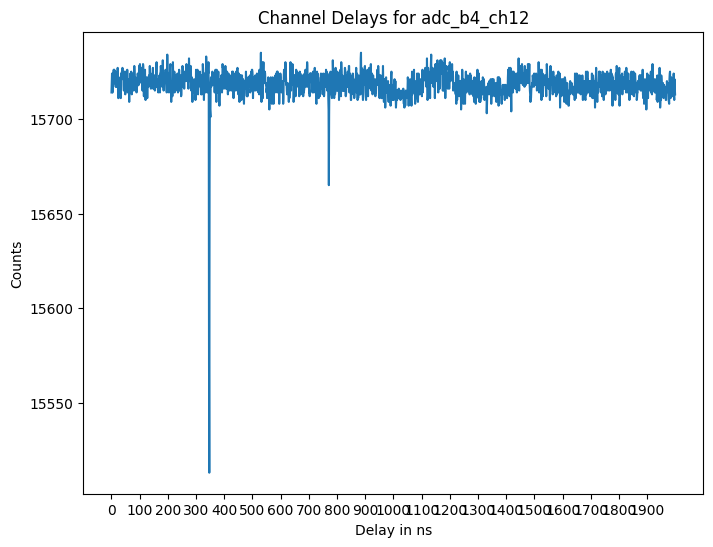

In [32]:
look_here = "/media/disk_d/WbLS-DATA/raw_root/phase3/muon/muon_water_241106T0956_84.root"
file_traces, event_ttt1, event_ttt2, event_ttt3, event_ttt4, event_ttt5, file_event_ids, file_event_sanity, file_daqkeys, file_run_info = get_1t_info(look_here)

ch_delay_list_per_file = get_channel_delays(file_traces)
alpha_events = alpha_event_list(file_traces)

plot_this = []
for i,elm in enumerate(ch_delay_list_per_file):
    if elm["adc_b2_ch7"] is None:
        continue
    if elm["adc_b2_ch7"] > 30:
        print(i)
print("all good?^")

# plt.figure(figsize=(8, 6))
# # plt.hist([elm[i]["adc_b2_ch7"] for i,elm in enumerate(alpha_events)], bins="auto", edgecolor="black")
# plt.hist([elm["adc_b2_ch7"] for elm in ch_delay_list_per_file if elm["adc_b2_ch7"] is not None], bins="auto", edgecolor="black")
# plt.title("Channel Delays for " + "adc_b2_ch7")
# plt.xlabel("Delay in ns")
# plt.ylabel("Counts")
# # plt.yscale("log")
# # plt.xlim(0, 100)
# # plt.xticks(np.arange(0, 1001, 50))

# # Save the figure
# plt.show()

# get weighted avg outputs
# weighted_indx, pos_wave = weighted_avg(file_traces["adc_b4_ch12"][alpha_events[2]])
print("new attempt", weighted_average_hit_time(file_traces["adc_b4_ch12"][alpha_events[23]]))

# get index of maximum from weighted average
# print(weighted_indx)

# using basic argmin to find index of maximum, and we see in the plot this is good
print("basic argmin", np.argmin(file_traces["adc_b4_ch12"][alpha_events[23]]))


plt.figure(figsize=(8, 6))
# plt.hist([elm[i]["adc_b2_ch7"] for i,elm in enumerate(alpha_events)], bins="auto", edgecolor="black")
plt.plot(file_traces["adc_b4_ch12"][alpha_events[23]])
# plt.plot(weighted_avg(file_traces["adc_b4_ch12"][alpha_events[2]])[1])
# print(np.median(file_traces["adc_b4_ch12"][111]) - np.min(file_traces["adc_b4_ch12"][111]))
plt.title("Channel Delays for " + "adc_b4_ch12")
plt.xlabel("Delay in ns")
plt.ylabel("Counts")
# plt.yscale("log")
# plt.xlim(0, 100)
plt.xticks(np.arange(0, 2000, 100))

# Save the figure
plt.show()

In [16]:
import numpy as np

def constant_fraction_time(signal, fraction=0.75, time_step=1.0):
    """
    Estimate the pulse time using Constant Fraction Discrimination (CFD).
    
    Parameters:
        signal (list or np.array): The waveform values.
        fraction (float): Fraction of max amplitude for threshold (e.g., 0.5 for 50%).
        time_step (float): Time difference between samples (default 1.0, adjust for real data).
        
    Returns:
        Estimated time when the signal crosses 'fraction' of its max.
    """
    signal = np.array(signal)
    max_val = np.max(signal)
    threshold = fraction * max_val

    # Find where signal crosses threshold
    for i in range(1, len(signal)):
        if signal[i-1] < threshold <= signal[i]:
            # Linear interpolation to estimate more precise crossing time
            t0 = (i - 1) * time_step
            y0 = signal[i - 1]
            y1 = signal[i]
            crossing_time = t0 + time_step * (threshold - y0) / (y1 - y0)
            return crossing_time

    return None  # No crossing found

# Simulated waveform with a pulse
waveform = [0, 0.2, 0.49, 77.0, 0.8, 0.4, 0.1, 0]

# Find time at 50% of max amplitude
t_cfd = constant_fraction_time(waveform, fraction=0.5, time_step=1.0)
print("Estimated pulse time (CFD):", t_cfd)


Estimated pulse time (CFD): 2.4967978042086


sus key adc_b1_ch13


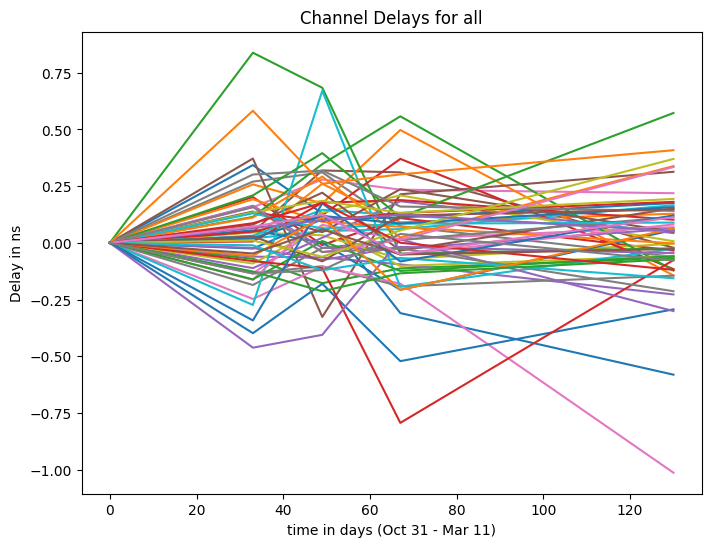

In [9]:
import numpy as np
from timing_corrections import RELEVANT_CHANNELS
import matplotlib.pyplot as plt

disk_d_phase_3 = {'adc_b1_ch1': np.float64(7.8599166820699455), 'adc_b1_ch2': np.float64(4.137286938987036), 'adc_b1_ch3': np.float64(5.644250785766227), 'adc_b1_ch4': np.float64(1.462657718896561), 'adc_b1_ch5': np.float64(5.524071457554394), 'adc_b1_ch6': np.float64(5.361634790589996), 'adc_b1_ch7': np.float64(3.6835674622379413), 'adc_b1_ch8': np.float64(3.390311229257317), 'adc_b1_ch9': np.float64(3.885940297701321), 'adc_b1_ch10': np.float64(4.002313495863018), 'adc_b1_ch11': np.float64(5.574106652639436), 'adc_b1_ch12': np.float64(3.320579019516295), 'adc_b1_ch13': np.float64(2.660567554458799), 'adc_b1_ch14': np.float64(3.8732563463897947), 'adc_b1_ch15': np.float64(4.588544445020013), 'adc_b2_ch0': np.float64(5.442728560753036), 'adc_b2_ch1': np.float64(3.9751018069295414), 'adc_b2_ch2': np.float64(4.136925603184994), 'adc_b2_ch3': np.float64(3.500059291700946), 'adc_b2_ch4': np.float64(2.409477059087277), 'adc_b2_ch5': np.float64(3.493177895364232), 'adc_b2_ch6': np.float64(6.087048492681964), 'adc_b2_ch7': np.float64(4.307377616221844), 'adc_b2_ch8': np.float64(0.5501019868669745), 'adc_b2_ch9': np.float64(4.226312224499658), 'adc_b2_ch10': np.float64(5.452678782887947), 'adc_b2_ch11': np.float64(5.4711195711996785), 'adc_b2_ch12': np.float64(4.0094185548337125), 'adc_b2_ch13': np.float64(4.145734108375976), 'adc_b2_ch14': np.float64(2.622552189482885), 'adc_b3_ch0': np.float64(3.735615561714709), 'adc_b3_ch1': np.float64(1.5551534431313372), 'adc_b3_ch2': np.float64(3.2140240057581737), 'adc_b3_ch3': np.float64(6.078257895491964), 'adc_b3_ch4': np.float64(1.374420389212863), 'adc_b3_ch5': np.float64(1.82331911635784), 'adc_b3_ch6': np.float64(4.0035516253739), 'adc_b3_ch7': np.float64(3.0441831226363254), 'adc_b3_ch8': np.float64(3.696769092129441), 'adc_b3_ch9': np.float64(4.446983385368631), 'adc_b3_ch10': np.float64(2.349290556173959), 'adc_b3_ch11': np.float64(3.4661601019222643), 'adc_b3_ch12': np.float64(2.455403277551272), 'adc_b3_ch13': np.float64(3.493090299471359), 'adc_b3_ch14': np.float64(3.546909956377859), 'adc_b3_ch15': np.float64(1.4014240642244342), 'adc_b4_ch0': np.float64(2.6902360275571273), 'adc_b4_ch1': np.float64(2.0598379017257926), 'adc_b4_ch2': np.float64(4.401598405966077), 'adc_b4_ch3': np.float64(3.811661383040349), 'adc_b4_ch4': np.float64(2.039541912010301), 'adc_b4_ch5': np.float64(1.9065206786959155), 'adc_b4_ch6': np.float64(2.8619874781139676), 'adc_b4_ch7': np.float64(3.820727716397706), 'adc_b4_ch8': np.float64(10.245670058727297), 'adc_b4_ch9': np.float64(2.8612404232736366), 'adc_b4_ch10': np.float64(3.975830419853631), 'adc_b4_ch11': np.float64(4.328957530614854)}
disk_a_phase_6 = {'adc_b1_ch1': np.float64(7.550315762982416), 'adc_b1_ch2': np.float64(4.2279287488665505), 'adc_b1_ch3': np.float64(5.53162868564406), 'adc_b1_ch4': np.float64(1.5718373736644606), 'adc_b1_ch5': np.float64(5.429269081744232), 'adc_b1_ch6': np.float64(5.672484761812406), 'adc_b1_ch7': np.float64(3.9181178580786975), 'adc_b1_ch8': np.float64(3.46381735976686), 'adc_b1_ch9': np.float64(3.8145488127584564), 'adc_b1_ch10': np.float64(4.06312057496275), 'adc_b1_ch11': np.float64(5.367256670685542), 'adc_b1_ch12': np.float64(3.8182201752046656), 'adc_b1_ch13': np.float64(2.6135356769488047), 'adc_b1_ch14': np.float64(4.243382135723792), 'adc_b1_ch15': np.float64(4.771922561684939), 'adc_b2_ch0': np.float64(5.657053247743757), 'adc_b2_ch1': np.float64(3.9912637690502324), 'adc_b2_ch2': np.float64(3.945376307410373), 'adc_b2_ch3': np.float64(3.709190991919168), 'adc_b2_ch4': np.float64(2.5304652130317153), 'adc_b2_ch5': np.float64(3.6054641898887834), 'adc_b2_ch6': np.float64(6.1581988684208735), 'adc_b2_ch7': np.float64(4.865275523163506), 'adc_b2_ch8': np.float64(0.738706578910052), 'adc_b2_ch9': np.float64(4.200789360267073), 'adc_b2_ch10': np.float64(5.4188065097760365), 'adc_b2_ch11': np.float64(5.29138682467591), 'adc_b2_ch12': np.float64(4.0217485316245645), 'adc_b2_ch13': np.float64(4.043953250192047), 'adc_b2_ch14': np.float64(2.429053512777241), 'adc_b3_ch0': np.float64(3.2142201458965327), 'adc_b3_ch1': np.float64(1.5787733623920759), 'adc_b3_ch2': np.float64(3.32783006285234), 'adc_b3_ch3': np.float64(6.209936881382594), 'adc_b3_ch4': np.float64(1.3566434573514434), 'adc_b3_ch5': np.float64(2.059819553803169), 'adc_b3_ch6': np.float64(3.95109370578511), 'adc_b3_ch7': np.float64(3.2043085739745996), 'adc_b3_ch8': np.float64(3.828900261567694), 'adc_b3_ch9': np.float64(4.5314879480281345), 'adc_b3_ch10': np.float64(2.434797802550851), 'adc_b3_ch11': np.float64(3.767981411743301), 'adc_b3_ch12': np.float64(2.331734878131715), 'adc_b3_ch13': np.float64(2.6995658724446767), 'adc_b3_ch14': np.float64(3.562044925820529), 'adc_b3_ch15': np.float64(1.5216296484041916), 'adc_b4_ch0': np.float64(2.704113081726384), 'adc_b4_ch1': np.float64(2.0354747883796236), 'adc_b4_ch2': np.float64(4.456335548544139), 'adc_b4_ch3': np.float64(3.7450287508165627), 'adc_b4_ch4': np.float64(1.9576182880873114), 'adc_b4_ch5': np.float64(1.6992223432285303), 'adc_b4_ch6': np.float64(2.7277897872599444), 'adc_b4_ch7': np.float64(3.821243571830856), 'adc_b4_ch8': np.float64(10.369953603527234), 'adc_b4_ch9': np.float64(2.809999951628208), 'adc_b4_ch10': np.float64(3.9260172761109775), 'adc_b4_ch11': np.float64(4.368435427926453)}

# used 50 files
disk_b_phase_6 = {'adc_b1_ch1': np.float64(7.9895436158749025), 'adc_b1_ch2': np.float64(4.397883828623454), 'adc_b1_ch3': np.float64(5.466468666733855), 'adc_b1_ch4': np.float64(1.4531179428062968), 'adc_b1_ch5': np.float64(5.46018892397303), 'adc_b1_ch6': np.float64(5.680855354057691), 'adc_b1_ch7': np.float64(3.963116626267559), 'adc_b1_ch8': np.float64(3.7011478688701476), 'adc_b1_ch9': np.float64(3.919218712302719), 'adc_b1_ch10': np.float64(4.053950701931467), 'adc_b1_ch11': np.float64(5.574917569091319), 'adc_b1_ch12': np.float64(3.4946922002103027), 'adc_b1_ch13': np.float64(3.3443432305072114), 'adc_b1_ch14': np.float64(3.9949691365846007), 'adc_b1_ch15': np.float64(4.611150134965591), 'adc_b2_ch0': np.float64(5.116254702369471), 'adc_b2_ch1': np.float64(4.054432414035188), 'adc_b2_ch2': np.float64(4.033825152294884), 'adc_b2_ch3': np.float64(3.633273302923722), 'adc_b2_ch4': np.float64(2.5551983872008863), 'adc_b2_ch5': np.float64(3.59695668842358), 'adc_b2_ch6': np.float64(6.179914072414766), 'adc_b2_ch7': np.float64(4.6545040530033805), 'adc_b2_ch8': np.float64(0.7267926909099574), 'adc_b2_ch9': np.float64(4.204334202521615), 'adc_b2_ch10': np.float64(5.673910217109128), 'adc_b2_ch11': np.float64(5.365833109295592), 'adc_b2_ch12': np.float64(3.9867337307600907), 'adc_b2_ch13': np.float64(4.2147521482635995), 'adc_b2_ch14': np.float64(3.293162390217585), 'adc_b3_ch0': np.float64(3.5554508396832456), 'adc_b3_ch1': np.float64(1.8474585478323093), 'adc_b3_ch2': np.float64(3.6095170768805334), 'adc_b3_ch3': np.float64(6.174840894418713), 'adc_b3_ch4': np.float64(1.2988886444503769), 'adc_b3_ch5': np.float64(1.8705122264985508), 'adc_b3_ch6': np.float64(4.130018741145859), 'adc_b3_ch7': np.float64(3.3628324078675567), 'adc_b3_ch8': np.float64(3.8822154609104564), 'adc_b3_ch9': np.float64(4.509963519965586), 'adc_b3_ch10': np.float64(2.4681703054885604), 'adc_b3_ch11': np.float64(3.7267239556452636), 'adc_b3_ch12': np.float64(2.4636975391267013), 'adc_b3_ch13': np.float64(3.3811676844812237), 'adc_b3_ch14': np.float64(3.1414845866449204), 'adc_b3_ch15': np.float64(1.319874462628027), 'adc_b4_ch0': np.float64(2.648902027092085), 'adc_b4_ch1': np.float64(2.0198844991182128), 'adc_b4_ch2': np.float64(4.3405691313063315), 'adc_b4_ch3': np.float64(3.690922268948601), 'adc_b4_ch4': np.float64(2.2136443371208054), 'adc_b4_ch5': np.float64(2.018295807078107), 'adc_b4_ch6': np.float64(2.6485458172847918), 'adc_b4_ch7': np.float64(3.9975243476311633), 'adc_b4_ch8': np.float64(10.34488219762427), 'adc_b4_ch9': np.float64(2.9208088447218983), 'adc_b4_ch10': np.float64(4.099047242814644), 'adc_b4_ch11': np.float64(4.208917645646078)}
disk_e_phase_4 = {'adc_b1_ch1': np.float64(8.202780422258764), 'adc_b1_ch2': np.float64(4.15740906506655), 'adc_b1_ch3': np.float64(5.574034508625212), 'adc_b1_ch4': np.float64(1.6646213698540704), 'adc_b1_ch5': np.float64(5.463295982399197), 'adc_b1_ch6': np.float64(5.409302133389168), 'adc_b1_ch7': np.float64(3.840291574772958), 'adc_b1_ch8': np.float64(3.6603060462202524), 'adc_b1_ch9': np.float64(3.9320148153327033), 'adc_b1_ch10': np.float64(4.022003414718097), 'adc_b1_ch11': np.float64(5.6294167752769155), 'adc_b1_ch12': np.float64(3.578252380637942), 'adc_b1_ch13': np.float64(3.498771856816807), 'adc_b1_ch14': np.float64(3.9224651796362338), 'adc_b1_ch15': np.float64(4.477229139165367), 'adc_b2_ch0': np.float64(5.814605052620603), 'adc_b2_ch1': np.float64(3.8400573742994597), 'adc_b2_ch2': np.float64(4.004392700853049), 'adc_b2_ch3': np.float64(3.5197659369335343), 'adc_b2_ch4': np.float64(2.440924755079192), 'adc_b2_ch5': np.float64(3.4680551522310505), 'adc_b2_ch6': np.float64(6.279166584151886), 'adc_b2_ch7': np.float64(4.4218622173912525), 'adc_b2_ch8': np.float64(0.5562226656374891), 'adc_b2_ch9': np.float64(4.390060400442941), 'adc_b2_ch10': np.float64(5.533503195204535), 'adc_b2_ch11': np.float64(5.223829872594265), 'adc_b2_ch12': np.float64(3.823714129647681), 'adc_b2_ch13': np.float64(4.054752148263631), 'adc_b2_ch14': np.float64(2.3487808276720124), 'adc_b3_ch0': np.float64(3.33736112797645), 'adc_b3_ch1': np.float64(1.6667315660917326), 'adc_b3_ch2': np.float64(3.423351974027864), 'adc_b3_ch3': np.float64(6.211281679459097), 'adc_b3_ch4': np.float64(1.3518561473109876), 'adc_b3_ch5': np.float64(1.9613404253380682), 'adc_b3_ch6': np.float64(3.840833848148845), 'adc_b3_ch7': np.float64(3.3455072911132495), 'adc_b3_ch8': np.float64(3.8311094721486803), 'adc_b3_ch9': np.float64(4.5771013438577395), 'adc_b3_ch10': np.float64(2.369274226310826), 'adc_b3_ch11': np.float64(4.048540179756879), 'adc_b3_ch12': np.float64(2.294500324127898), 'adc_b3_ch13': np.float64(3.4128794605255703), 'adc_b3_ch14': np.float64(3.084882343975706), 'adc_b3_ch15': np.float64(1.4297591545820207), 'adc_b4_ch0': np.float64(2.850740647708769), 'adc_b4_ch1': np.float64(2.217978559118741), 'adc_b4_ch2': np.float64(4.41186642937317), 'adc_b4_ch3': np.float64(3.800697373154709), 'adc_b4_ch4': np.float64(1.6976234263256709), 'adc_b4_ch5': np.float64(1.8496511596950316), 'adc_b4_ch6': np.float64(2.7356183903993316), 'adc_b4_ch7': np.float64(3.907376780561727), 'adc_b4_ch8': np.float64(10.311279529931609), 'adc_b4_ch9': np.float64(2.8144138710421998), 'adc_b4_ch10': np.float64(4.047511889036665), 'adc_b4_ch11': np.float64(4.1939071260396865)}

disk_k_phase_8 = {'adc_b1_ch1': np.float64(7.2789115369563095), 'adc_b1_ch2': np.float64(4.265674901417602), 'adc_b1_ch3': np.float64(5.577876857913603), 'adc_b1_ch4': np.float64(1.4284791180383207), 'adc_b1_ch5': np.float64(5.296731497991809), 'adc_b1_ch6': np.float64(5.340305123402381), 'adc_b1_ch7': np.float64(3.9025018950943133), 'adc_b1_ch8': np.float64(3.3290378656346564), 'adc_b1_ch9': np.float64(3.8822186148534534), 'adc_b1_ch10': np.float64(4.168288706655699), 'adc_b1_ch11': np.float64(5.630742357458182), 'adc_b1_ch12': np.float64(3.176798321389193), 'adc_b1_ch13': np.float64(2.636501478835617), 'adc_b1_ch14': np.float64(3.757620661864749), 'adc_b1_ch15': np.float64(4.631693149051081), 'adc_b2_ch0': np.float64(5.75605868430716), 'adc_b2_ch1': np.float64(4.044198013242846), 'adc_b2_ch2': np.float64(3.99218481804873), 'adc_b2_ch3': np.float64(3.5072277504822256), 'adc_b2_ch4': np.float64(2.4646066520412377), 'adc_b2_ch5': np.float64(3.66884110571994), 'adc_b2_ch6': np.float64(6.0848446058413455), 'adc_b2_ch7': np.float64(4.18533454219572), 'adc_b2_ch8': np.float64(0.6521201336279718), 'adc_b2_ch9': np.float64(4.2890391970978285), 'adc_b2_ch10': np.float64(5.604685697013938), 'adc_b2_ch11': np.float64(4.4578664102193235), 'adc_b2_ch12': np.float64(4.123483970351583), 'adc_b2_ch13': np.float64(4.08831536665447), 'adc_b2_ch14': np.float64(2.5962437226528117), 'adc_b3_ch0': np.float64(3.442589791305678), 'adc_b3_ch1': np.float64(1.8936388527946293), 'adc_b3_ch2': np.float64(3.78653538627037), 'adc_b3_ch3': np.float64(6.2590435804617695), 'adc_b3_ch4': np.float64(1.3293031896334546), 'adc_b3_ch5': np.float64(1.8722080052467223), 'adc_b3_ch6': np.float64(4.0849637960908876), 'adc_b3_ch7': np.float64(3.185307466951911), 'adc_b3_ch8': np.float64(3.8904644028598887), 'adc_b3_ch9': np.float64(4.536421799322957), 'adc_b3_ch10': np.float64(2.506765320737249), 'adc_b3_ch11': np.float64(3.8746866259034163), 'adc_b3_ch12': np.float64(2.396616695331079), 'adc_b3_ch13': np.float64(3.417212658026241), 'adc_b3_ch14': np.float64(3.246248631680017), 'adc_b3_ch15': np.float64(1.5491054050894402), 'adc_b4_ch0': np.float64(3.024495294305304), 'adc_b4_ch1': np.float64(1.846731305030325), 'adc_b4_ch2': np.float64(4.771655634275369), 'adc_b4_ch3': np.float64(3.65562375904084), 'adc_b4_ch4': np.float64(2.160685653647371), 'adc_b4_ch5': np.float64(1.9705215421138749), 'adc_b4_ch6': np.float64(2.789913065890737), 'adc_b4_ch7': np.float64(3.7017333915049524), 'adc_b4_ch8': np.float64(10.297854690969485), 'adc_b4_ch9': np.float64(2.8341494076225557), 'adc_b4_ch10': np.float64(4.088753125167594), 'adc_b4_ch11': np.float64(4.251758108079468)}

# in order of date
dicts = [disk_d_phase_3, disk_e_phase_4, disk_b_phase_6, disk_a_phase_6, disk_k_phase_8]

# combined = {key: [d[key] for d in dicts] for key in dicts[0]}

# for key, value in combined.items():
#     print("Max minus min for", key, max(value) - min(value))
time_in_days = [0, 33, 49, 67, 130]
plt.figure(figsize=(8, 6))
plt.title("Channel Delays for all")
for key in RELEVANT_CHANNELS:
    ordered_median_delays = []
    for i in range(len(dicts)):
        ordered_median_delays.append(dicts[i][key])
    plt.plot(time_in_days, [i - ordered_median_delays[0] for i in ordered_median_delays])
    if max([i - ordered_median_delays[0] for i in ordered_median_delays]) > 0.75:
        print("sus key", key)
    plt.xlabel("time in days (Oct 31 - Mar 11)")
    plt.ylabel("Delay in ns")
plt.show()

In [ ]:
import pickle
def load_data(fname):
    with open(fname, "rb") as f:
        data = pickle.load(f)
    return data

fileee = "/storage/group/dfc13/default/dcolson/BNL/data/infile_data4/recos/elosstank_digit_edge_per/elosstank_digit_edge_per_reco_91.pkl"
data = load_data(fileee)

def calc_radius(x, y):
    """Simple stuff"""
    return (x**2 + y**2)**0.5

def get_delta_radius(data, entry_or_exit: str) -> list[float]:
    delta_radius_list = []
    num_events = len(data)
    for i in range(num_events):
        if entry_or_exit == "entry":
            reco_x = data[i]["reco"][0]
            reco_y = data[i]["reco"][1]
            true_x = data[i]["truth"][0]
            true_y = data[i]["truth"][1]
        elif entry_or_exit == "exit":
            reco_x = data[i]["reco"][2]
            reco_y = data[i]["reco"][3]
            true_x = data[i]["truth"][2]
            true_y = data[i]["truth"][3]
        delta_radius_list.append(calc_radius(reco_x, reco_y) - calc_radius(true_x, true_y))

def majority_trigger(event) -> bool:
    """Index into the 26th hit. If it is one of the 28 bottom PMTs, we know
    this is a majority trigger event."""
    pmt_num = event["hits"][25][4]
    if pmt_num <= 28:
        return True
    return False

In [4]:
print(sum([  -172,   -188,   -726,  14898, -30156,  14896.])/50)

-28.96


In [1]:
boopy = [1,2,3,4,5,6,7,7,88,9,7,6,5,43,2,3,4,56,7,89,8,765,43345,6,7999,7654]
print(boopy[:-1])

[1, 2, 3, 4, 5, 6, 7, 7, 88, 9, 7, 6, 5, 43, 2, 3, 4, 56, 7, 89, 8, 765, 43345, 6, 7999]
